# 01 - Exploração de Dados

Este notebook carrega e explora os datasets de fake news em português:
- **Fake.Br Corpus**: 7.200 notícias brasileiras
- **FakeRecogna**: 11.902 notícias brasileiras

## Objetivos
1. Carregar os datasets
2. Analisar distribuição de classes
3. Explorar características textuais
4. Visualizar estatísticas descritivas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Local imports
import sys
from pathlib import Path
from loguru import logger

project_root = Path().resolve().parent
sys.path.insert(0, str(project_root / "src"))

# Configurar logger
logger.remove()
logger.add(sys.stderr, level="INFO")
logger.add(project_root / "reports/logs/01_data_exploration.log", rotation="10 MB")

from config import DATASETS, PATHS
from data.data_loader import load_dataset, get_dataset_stats

## 1. Carregar Datasets

In [3]:
# from datasets import load_dataset

# fakebr = load_dataset("fake-news-UFG/fakebr", split='train', trust_remote_code=True)
# akerecogna = load_dataset("recogna-nlp/fakerecogna2-extrativa", split='train')

# df_fakebr = fakebr.to_pandas()
# df_fakerecogna = akerecogna.to_pandas()

In [4]:
df_fakebr = load_dataset('fakebr')
df_fakerecogna = load_dataset('fakerecogna')

Carregando dataset: Fake.Br Corpus
Dataset carregado: 7200 amostras
Carregando dataset: FakeRecogna
Dataset carregado: 52800 amostras


## 2. Análise Exploratória - Fake.Br

In [18]:
pd.DataFrame([get_dataset_stats(df_fakebr)], index=['Fake.Br']).T

,Fake.Br
total_samples,7200.00000
fake_samples,3600.00000
true_samples,3600.00000
avg_text_length,3898.90625
min_text_length,46.00000
max_text_length,46084.00000


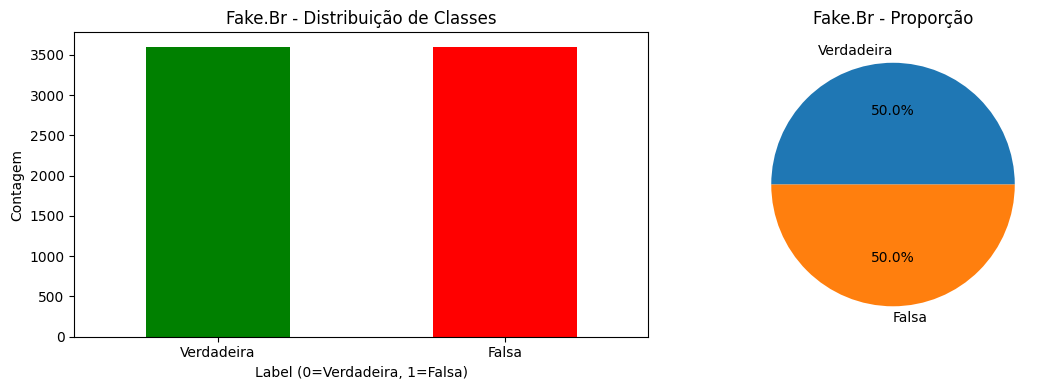

In [6]:
# Distribuição de classes
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras
df_fakebr['label'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Fake.Br - Distribuição de Classes')
axes[0].set_xlabel('Label (0=Verdadeira, 1=Falsa)')
axes[0].set_ylabel('Contagem')
axes[0].set_xticklabels(['Verdadeira', 'Falsa'], rotation=0)

# Gráfico de pizza
df_fakebr['label'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', labels=['Verdadeira', 'Falsa'])
axes[1].set_title('Fake.Br - Proporção')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

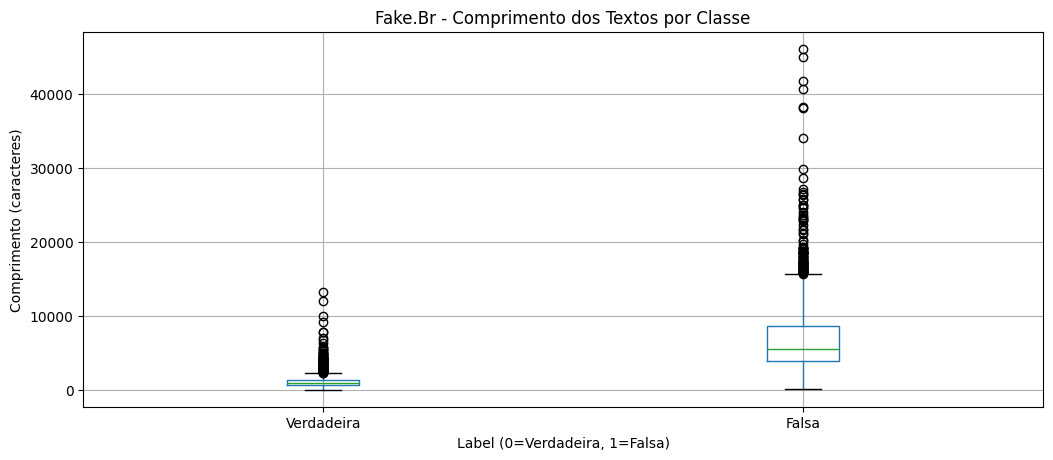

In [7]:
# Distribuição do comprimento dos textos
df_fakebr['text_length'] = df_fakebr['text'].str.len()

fig, ax = plt.subplots(figsize=(12, 5))
df_fakebr.boxplot(column='text_length', by='label', ax=ax)
ax.set_title('Fake.Br - Comprimento dos Textos por Classe')
ax.set_xlabel('Label (0=Verdadeira, 1=Falsa)')
ax.set_ylabel('Comprimento (caracteres)')
ax.set_xticklabels(['Verdadeira', 'Falsa'])
plt.suptitle('')
plt.show()

## 3. Análise Exploratória - FakeRecogna

In [9]:
df_fakerecogna

,Unnamed: 0,Titulo,Categoria,Autor,Data,URL,text,label,Subtitulo
0,31105,Chico Anysio disse “Se é a pobreza que vota na...,Entretenimento,Edgard Matsuki,15/10/2022,https://www.boatos.org/entretenimento/chico-an...,chico anysio disse “se é a pobreza que vota na...,1,Chico Anysio disse “Se é a pobreza que vota na...
1,40303,O Padre Marcelo Rossi gravou áudio pedindo vot...,Falso,Gilmar Lopes -,14 de setembro de 2018,http://www.e-farsas.com/o-padre-marcelo-rossi-...,o áudio compartilhado através de grupos do wha...,1,Será que o padre Marcelo Rossi gravou mesmo um...
2,6014,Rondônia recebe a Oficina Previne Brasil nesta...,saúde,Paula BittarMinistério da Saúde,18/10/2021 14h51,https://www.gov.br/saude/pt-br/assuntos/notici...,gestores dos 52 municípios de rondônia se reun...,0,None
3,50488,\n Viúva de Che Guevara não poderia receber a...,política,AFP Brasil,27 agosto 2022 às 00:40,https://checamos.afp.com//doc.afp.com.32H6946,“durma-se com um barulho desse: viúva do che g...,1,A viúva de Ernesto Che Guevara não recebe apos...
4,28833,\nVídeo não mostra urna adulterada dentro de c...,\nNas Redes\n,Por Luiz Fernando Menezes,\n 29 de\n novembro de\n ...,https://www.aosfatos.org/noticias/video-nao-mo...,um vídeo que circula nas redes sociais mostre ...,1,None
...,...,...,...,...,...,...,...,...,...
52795,455,Homem agride cinegrafista da GloboNews; PM não...,entretenimento,Mariana Durães,12/10/2021 21h38Atualizada em 13/10/2021 17h12,https://tvefamosos.uol.com.br/noticias/redacao...,um professor de escola pública agrediu hoje o ...,0,None
52796,50207,\n Fotos de viaturas lilás para combate à vio...,política,AFP Brasil,24 fevereiro 2023 às 21:08,https://checamos.afp.com//doc.afp.com.339Y9YZ,“já chegaram no piauí as novas viaturas da pol...,1,"Em 10 de fevereiro de 2023, a Polícia Militar ..."
52797,2018,Lira: Pesquisa é retrato do momento e Bolsonar...,política,Camila Turtelli,25/05/2021 11h55Atualizada em 25/05/2021 12h21,None,"para o presidente da câmara, arthur lira (pp-a...",0,None
52798,49028,Não há evidências que liguem morte de ...,UOL Confere,"Do UOL, em São Paulo*",22/09/2020 19h28,https://noticias.uol.com.br/comprova/ultimas-n...,as postagens que afirmam que o uso de máscaras...,1,None


In [13]:
df_fakerecogna["text"].str.len().max()

np.int64(12904)

In [17]:
pd.DataFrame(get_dataset_stats(df_fakerecogna), index=['FakeRecogna']).T

,FakeRecogna
total_samples,52800.000
fake_samples,26400.000
true_samples,26400.000
avg_text_length,538.925
min_text_length,1.000
max_text_length,12904.000


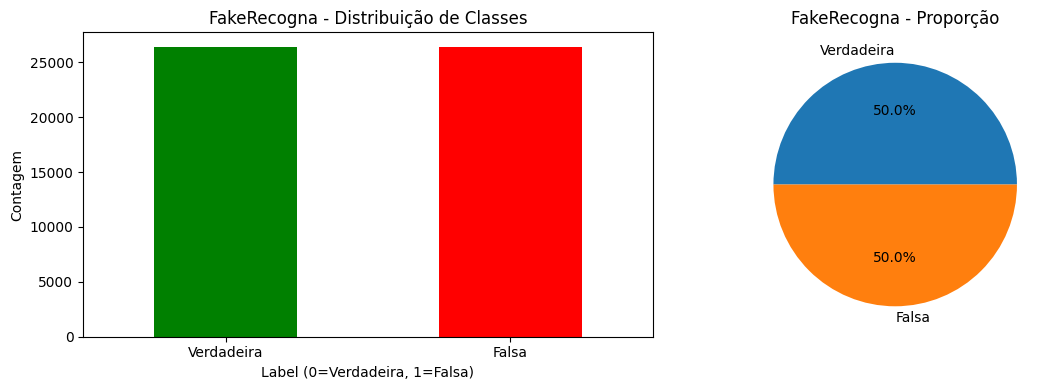

In [19]:
# Distribuição de classes
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_fakerecogna['label'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('FakeRecogna - Distribuição de Classes')
axes[0].set_xlabel('Label (0=Verdadeira, 1=Falsa)')
axes[0].set_ylabel('Contagem')
axes[0].set_xticklabels(['Verdadeira', 'Falsa'], rotation=0)

df_fakerecogna['label'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', labels=['Verdadeira', 'Falsa'])
axes[1].set_title('FakeRecogna - Proporção')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

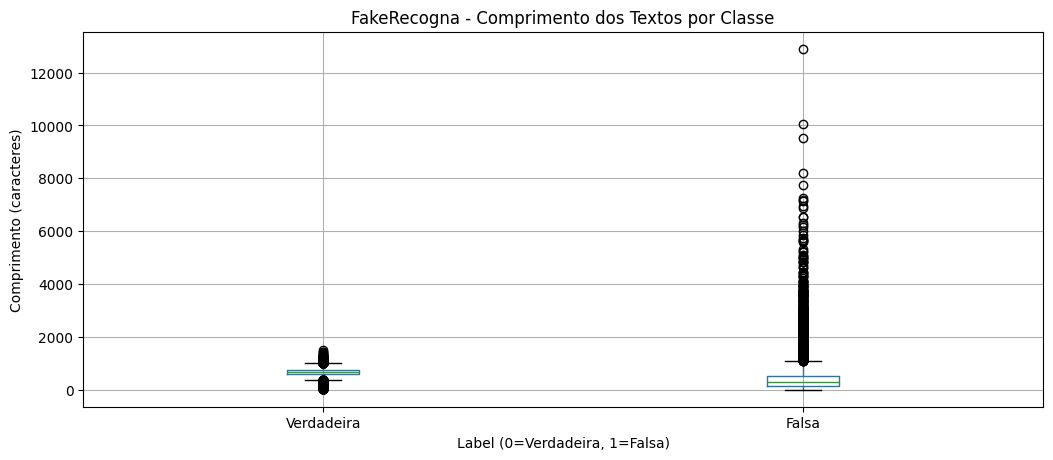

In [23]:
# Distribuição do comprimento dos textos
df_fakerecogna['text_length'] = df_fakerecogna['text'].str.len()

fig, ax = plt.subplots(figsize=(12, 5))
df_fakerecogna.boxplot(column='text_length', by='label', ax=ax)
ax.set_title('FakeRecogna - Comprimento dos Textos por Classe')
ax.set_xlabel('Label (0=Verdadeira, 1=Falsa)')
ax.set_ylabel('Comprimento (caracteres)')
ax.set_xticklabels(['Verdadeira', 'Falsa'])
plt.suptitle('')
plt.show()

## 4. Comparação entre Datasets

In [20]:
# Tabela comparativa
comparison = pd.DataFrame({
    'Fake.Br': get_dataset_stats(df_fakebr),
    'FakeRecogna': get_dataset_stats(df_fakerecogna)
})

comparison

,Fake.Br,FakeRecogna
total_samples,7200.00000,52800.000
fake_samples,3600.00000,26400.000
true_samples,3600.00000,26400.000
avg_text_length,3898.90625,538.925
min_text_length,46.00000,1.000
max_text_length,46084.00000,12904.000


In [21]:
# Salvar datasets processados
processed_dir = Path(PATHS['processed_dir'])
processed_dir.mkdir(parents=True, exist_ok=True)

df_fakebr.to_csv(processed_dir / 'fakebr_processed.csv', index=False)
df_fakerecogna.to_csv(processed_dir / 'fakerecogna_processed.csv', index=False)

logger.info(f"✅ Datasets salvos em: {processed_dir}")

✅ Datasets salvos em: /Users/joaoroldi/Projects/tcc2/data/processed


## Conclusões

- Ambos os datasets estão balanceados
- Fake.Br tem textos mais longos em média
- Em ambos os dataset as notícias falsas costumam possuem outliers em termos de comprimento. Ver se filtrar esses casos afeta performance
- FakeRecogna tem mais amostras (11.902 vs 7.200)
- Próximo passo: Testar modelos de linguagem